# Capstone Project

Employee Salary Prediction Using Machine Learning Algorithms with Streamlit Deployment

Steps...





In [45]:
!pip install pandas

In [46]:
!pip install numpy
!pip install matplotlib
!pip install stramlit
!pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement stramlit (from versions: none)
ERROR: No matching distribution found for stramlit


In [ ]:
!pip install joblib


In [81]:
!pip install seaborn

# 1. Load the dateset

In [48]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('employee_attrition_data.csv', sep=',')

# Just put the DataFrame as the last line
df.head(10)  # or simply df


,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
5,5,47,Male,Sales,HR Specialist,10,0.889018,237,0,97212,0
6,6,58,Male,Marketing,HR Specialist,5,0.688977,155,1,97865,0
7,7,57,Female,Sales,Analyst,8,0.981679,171,0,50113,0
8,8,34,Female,Finance,Accountant,6,0.010381,177,1,88747,1
9,9,57,Female,Marketing,Engineer,7,0.466782,170,0,43283,0


# 2. Take a look at the data set





In [49]:
df.tail(10)

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
990,990,36,Female,Engineering,Accountant,9,0.558512,182,1,65638,1
991,991,47,Male,Marketing,Manager,2,0.889621,243,0,78726,1
992,992,46,Female,HR,Analyst,8,0.955095,176,1,79044,1
993,993,47,Female,HR,Analyst,5,0.932450,193,0,47301,0
994,994,47,Male,Marketing,HR Specialist,2,0.992018,186,1,31507,0
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1
999,999,59,Male,Sales,HR Specialist,1,0.940510,159,0,73220,1


In [50]:
print(df.columns)

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


# 3. Check for the missing values

In [52]:
df.isna()
df.isnull().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

# 4. Check for the duplicate Values

In [53]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [54]:
df.duplicated().sum()

np.int64(0)

# 5. Remove the unwanted columns

In [55]:
df.drop(columns= 'Employee_ID', inplace=True)

In [56]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


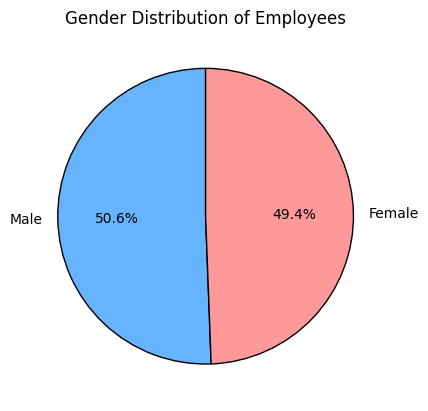

In [57]:
import matplotlib.pyplot as plt

df['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Gender Distribution of Employees', fontsize=12)
plt.ylabel('')
plt.show()


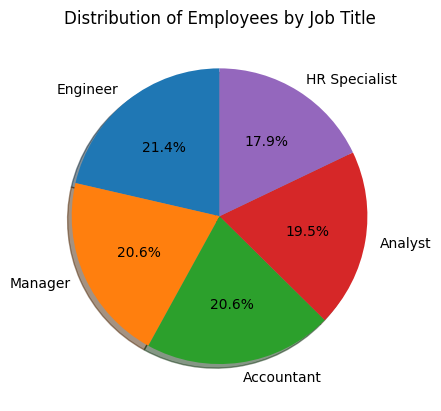

In [58]:
import matplotlib.pyplot as plt

df['Job_Title'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)

plt.title('Distribution of Employees by Job Title')

plt.ylabel('')
plt.show()


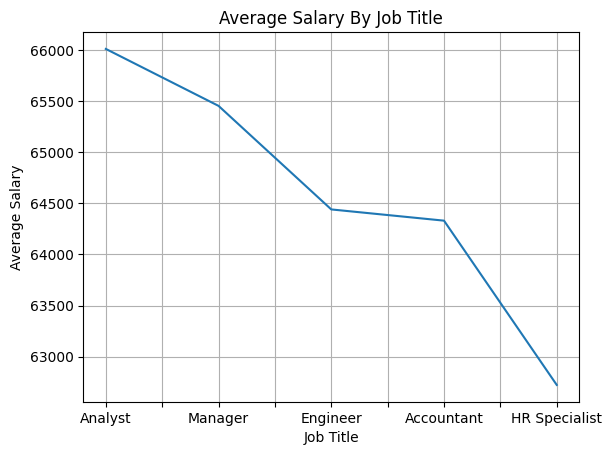

In [59]:
df.groupby("Job_Title")["Salary"].mean().sort_values(ascending=False).plot(kind="line")
plt.title('Average Salary By Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

In [60]:
df.groupby(["Department","Promotion_Last_5Years"])["Salary"].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [61]:
df.head()


,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [62]:
df.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

In [63]:
x=df[["Years_at_Company","Satisfaction_Level","Average_Monthly_Hours"]]
y=df["Salary"]
print(x)
print(y)

     Years_at_Company  Satisfaction_Level  Average_Monthly_Hours
0                   9            0.586251                    151
1                  10            0.261161                    221
2                   8            0.304382                    184
3                   1            0.480779                    242
4                  10            0.636244                    229
..                ...                 ...                    ...
995                 3            0.377435                    239
996                 1            0.431152                    154
997                 3            0.647102                    206
998                 2            0.304813                    241
999                 1            0.940510                    159

[1000 rows x 3 columns]
0      60132
1      79947
2      46958
3      40662
4      74307
       ...  
995    71403
996    30181
997    64143
998    74383
999    73220
Name: Salary, Length: 1000, dtype: int64


In [64]:
from sklearn.model_selection import train_test_split

# Assuming X = input features, y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [65]:
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_test = scaler.transform(x_test)


In [66]:
x_train

array([[ 1.20355456,  0.27707872, -1.63733175],
       [ 1.55806253, -0.84527027,  0.7261686 ],
       [ 0.84904659, -0.69605375, -0.52311016],
       ...,
       [-0.92349326,  0.48716282,  0.21970424],
       [-1.27800123, -0.69456577,  1.40145442],
       [-1.6325092 ,  1.50012967, -1.36721743]], shape=(1000, 3))

In [67]:
import joblib
joblib.dump(scaler,"scaler.pki")

['scaler.pki']

In [68]:
x_test=scaler.fit_transform(x_test)
x_test

array([[ 0.47597324,  1.30983557,  0.33822898],
       [ 1.19442342, -1.72064442, -0.91203378],
       [ 1.55364851, -0.41804212, -0.05659084],
       [ 1.55364851, -1.7959776 , -1.10944369],
       [-0.24247694, -0.56605424, -1.10944369],
       [ 0.83519833,  0.94451894, -1.5042635 ],
       [ 0.47597324, -0.43212457, -1.5042635 ],
       [ 0.47597324,  0.87641335,  1.48978678],
       [-0.24247694,  0.10446999, -1.57006681],
       [-0.24247694,  0.53445167,  1.45688512],
       [ 0.83519833, -0.5658673 ,  0.50273723],
       [ 0.11674815,  1.18744793, -0.55011561],
       [ 0.83519833,  0.40748739, -0.58301726],
       [ 0.47597324, -1.10009824,  1.58849173],
       [ 0.47597324,  0.09453447,  0.07501577],
       [-1.67937729,  0.28111418, -1.47136185],
       [-0.96092711, -1.73083211,  0.83175375],
       [ 1.19442342,  1.37039705,  0.89755705],
       [ 0.47597324,  0.40164366, -1.20814864],
       [-1.3201522 , -0.49251488,  0.89755705],
       [ 0.47597324, -0.88101666,  0.963

In [69]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
def results(predictions):
    print("Mean Absolute Error on model is{}", format(mean_absolute_error(y_test, predictions)))
    print("Root Mean Squared Error on model is{}", format(np.sqrt(mean_squared_error(y_test, predictions))))


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('employee_attrition_data.csv', sep=',')



# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
predictions = lr.predict(x_test)
results(predictions)

Mean Absolute Error on model is{} 18474.128739496846
Root Mean Squared Error on model is{} 21146.08966174978


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svrmodel= SVR()

param_gridsvr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'poly', 'rbf'], #ensure valid kernel types
    'degree': [2, 3, 4], #only apllicable if poly kernel is used
}


In [73]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)


In [74]:
gridsvr.fit(x_train, y_train.values.ravel())

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'epsilon': [0.1, 0.2, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [75]:
gridsvr.best_params_

{'C': 0.1, 'degree': 2, 'epsilon': 0.2, 'kernel': 'linear'}

In [76]:
predictionsvr=gridsvr.predict(x_test)
results(predictionsvr)

Mean Absolute Error on model is{} 18513.944550086257
Root Mean Squared Error on model is{} 21179.250754687673


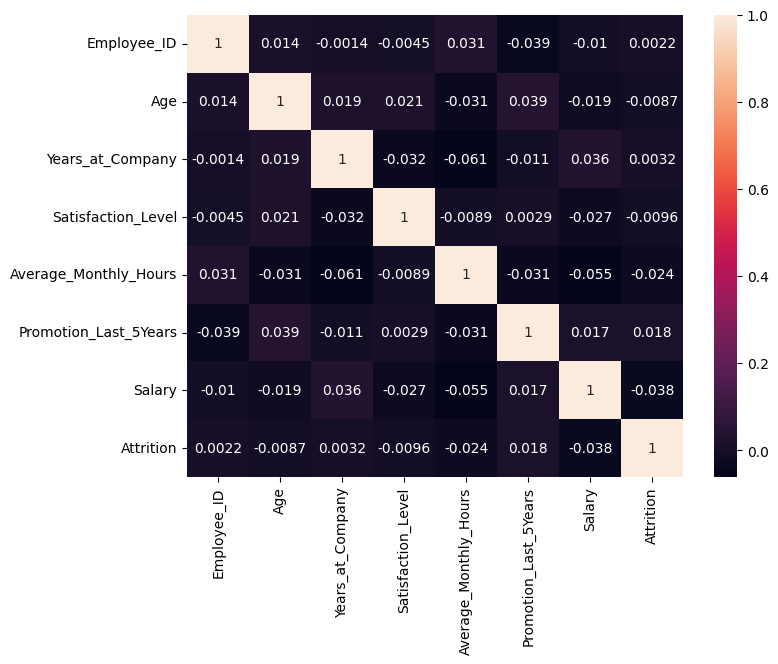

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
numeric_f= df.select_dtypes(include=np.number)
sns.heatmap(numeric_f.corr(), annot=True)
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()

In [84]:
param_gridsvr={
    "n_estimators": [2,3,4,5,6],
    "max_depth": [5,10,15]
    }

In [85]:
gridrfr = GridSearchCV(estimator=rfmodel, param_grid=param_gridsvr,cv=5)

In [86]:
gridrfr.fit(x_train, y_train.values.ravel())

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,6


In [87]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 6}

In [88]:
predictionofrfr=gridrfr.predict(x_test)
results(predictionofrfr)

Mean Absolute Error on model is{} 19149.72073360386
Root Mean Squared Error on model is{} 21950.62944505523


In [89]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Linear Regression RMSE: 21146.09
Random Forest RMSE: 22999.45
SVM RMSE: 21098.66


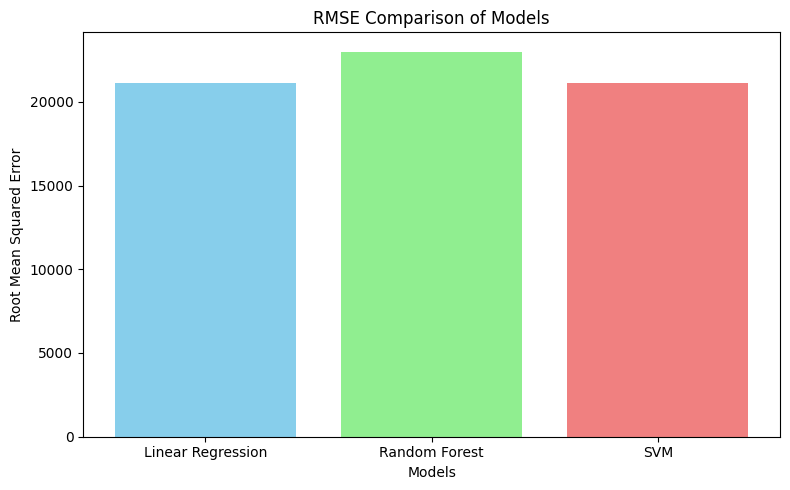

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Example: Load your data
# df = pd.read_csv("your_file.csv")
# X = df.drop("target_column", axis=1)
# y = df["target_column"]

# Assuming you already have X and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR()
}

rmse_scores = {}

# Train and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores[name] = rmse
    print(f"{name} RMSE: {rmse:.2f}")

# Plot RMSE comparison
plt.figure(figsize=(8, 5))
plt.bar(rmse_scores.keys(), rmse_scores.values(), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title("RMSE Comparison of Models")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Models")
plt.tight_layout()
plt.show()


In [91]:
joblib.dump(lr,"model.pki")

['model.pki']

In [92]:
x.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')